In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set default theme
sns.set_theme()

## Tablet familiarity

In [3]:
df = pd.read_csv("form_data/familiarity_with_tablet.csv")
df

,How familiar are you with drawing tablet?
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


<AxesSubplot: xlabel='How familiar are you with drawing tablet?', ylabel='count'>

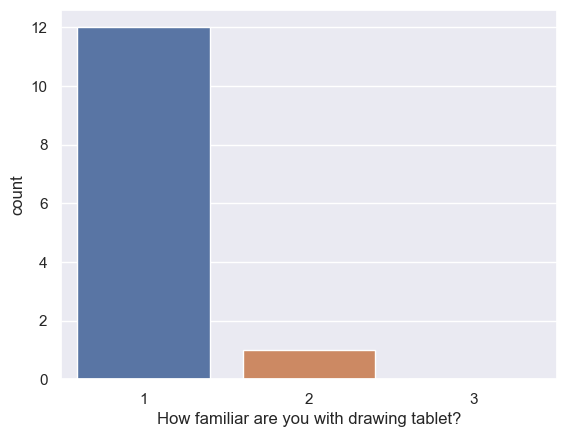

In [4]:
sns.countplot(x=df["How familiar are you with drawing tablet?"], order=[1, 2, 3])

## Form results analysis

In [5]:
df = pd.read_csv("form_data/organized.csv")
df

,Input method,How mentally demanding was the task?,How physically demanding was the task?,How successful were you in accomplishing what you were asked to do?,How hard did you have to work to accomplish your level of performance?,"How insecure, discouraged, irritated, stressed, and annoyed were you?"
0,Graphic Table / Bubble,2,3,9,3,2
1,Graphic Table / Bubble,7,4,8,5,9
2,Graphic Table / Bubble,2,4,8,1,1
3,Graphic Table / Bubble,6,4,8,6,3
4,Graphic Table / Bubble,1,2,9,1,1
5,Graphic Table / Bubble,5,3,8,7,1
6,Graphic Table / Bubble,5,5,10,2,2
7,Graphic Table / Bubble,6,7,7,6,4
8,Graphic Table / Bubble,3,7,7,5,6
9,Graphic Table / Bubble,5,1,10,1,1


In [6]:
df.groupby(["Input method"]).mean()

,How mentally demanding was the task?,How physically demanding was the task?,How successful were you in accomplishing what you were asked to do?,How hard did you have to work to accomplish your level of performance?,"How insecure, discouraged, irritated, stressed, and annoyed were you?"
Input method,,,,,
Graphic Table / Bubble,3.846154,3.692308,8.461538,3.615385,2.692308
Graphic Table / No bubble,4.076923,4.230769,7.846154,4.846154,3.230769
Mouse / Bubble,3.307692,3.923077,8.692308,3.384615,2.846154
Mouse / No bubble,3.538462,5.000000,7.769231,5.153846,3.000000


### Score

In [7]:
def get_score(row):
  # score are converted from [1, 10] to [0, 9] and flipped 10 become 0 and 1 become 9
  values = [10-n for n in row[1:]] 

  # 3rd question is positively worded so inverse the scale for others
  values[2] = 9-values[2]

  # return input method + score out of 100 (the higher the better)
  return pd.Series([row[0], (sum(values) / 45) * 100])

scores = df.apply(lambda row: get_score(row), axis=1)
scores.columns = (["Input method", "Score"])
scores.groupby("Input method").mean()

,Score
Input method,
Graphic Table / Bubble,74.700855
Graphic Table / No bubble,67.692308
Mouse / Bubble,76.068376
Mouse / No bubble,66.837607


<AxesSubplot: xlabel='Score', ylabel='Input method'>

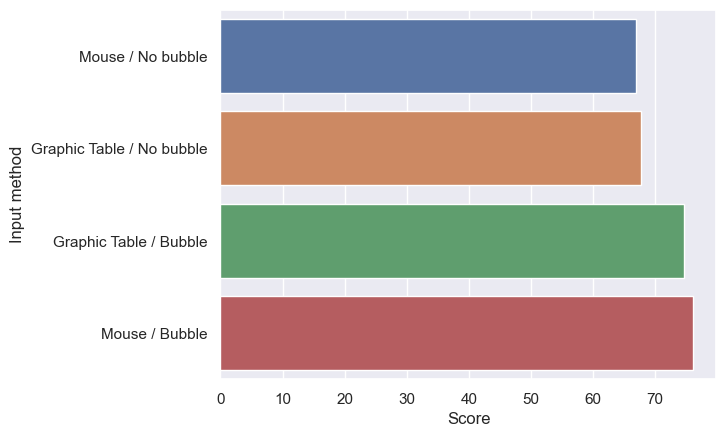

In [8]:
order = ["Mouse / No bubble", "Graphic Table / No bubble", "Graphic Table / Bubble", "Mouse / Bubble"]
sns.barplot(y="Input method", x="Score", data=scores, errorbar=None, order=order)

<AxesSubplot: xlabel='Score', ylabel='Input method'>

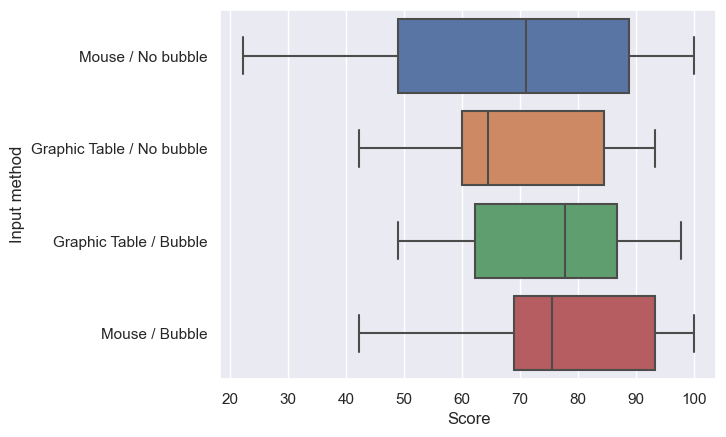

In [9]:
sns.boxplot(y="Input method", x="Score", data=scores, orient="h", order=order)